<a href="https://colab.research.google.com/github/som-12211285/Sleep-Health-Digital-Screen-Exposure-Risk-Prediction/blob/main/Sleep_Health_and_Digital_Screen_Exposure_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SOMTIRTHA CHAKRABORTY

12211285

CSM 355 :MACHINE LEARNING PROJECT

# **`Sleep Health and Digital Screen Exposure Risk Prediction`**

## **About Dataset**
Understanding the relationship between sleep quality, stress levels, and digital screen exposure is crucial for analyzing modern lifestyle impacts on health. This dataset provides detailed insights into various factors affecting sleep and eye health, including sleep duration, stress, physical activity, medical history, and digital device usage before bed.

## **DATASET OVERVIEW**

This dataset contains multiple health-related attributes collected from individuals, including their sleep quality, stress levels, heart rate, and screen exposure habits. It can be used for statistical analysis, machine learning modeling, and health-related research.

## **Column Description**

* Gender: Gender of the individual (M/F)
* Age: Age of the individual (in years)
* Sleep Duration: Average sleep duration (in hours)
* Sleep Quality: Self-reported sleep quality (Scale: 1 - Poor to 5 - Excellent)
* Stress Level: Stress level (Scale: 1 - Low to 5 - High)
* Blood Pressure: Recorded blood pressure (systolic/diastolic in mmHg)
* Heart Rate: Resting heart rate (in bpm)
* Daily Steps: Average daily steps taken
* Physical Activity: Level of physical activity (quantified measure)
* Height: Height of the individual (in cm)
* Smoking: Whether the individual is a smoker (Y/N)
* Medical Issue: Any existing medical conditions (Y/N)
* Ongoing Medication: Whether the individual is on medication (Y/N)
* Smart Device Before Bed: Usage of digital devices before sleep (Y/N)
* Average Screen Time: Average daily screen time (in hours)
* Blue-Light Filter: Whether the individual uses a blue-light filter (Y/N)
* Discomfort/Eye-Strain: Experience of eye discomfort or strain (Y/N)
* Redness in Eye: Experience of eye redness (Y/N)
* Itchiness/Irritation in Eye: Experience of eye itchiness or irritation (Y/N)
* Dry Eye Disease: Diagnosis or symptoms of Dry Eye Disease (Y/N)





### **Problem Statement**
Analyze the impact of digital screen exposure on sleep health by developing a machine learning model to predict sleep quality, identify risk factors contributing to poor sleep, and provide data-driven recommendations for better sleep habits.

### **Objectives** :
* Predict sleep quality based on screen usage and other health factors.
* Identify risk factors contributing to poor sleep health.
* Cluster individuals based on sleep behavior and screen usage patterns.
* Recommend lifestyle changes for improved sleep based on data-driven insights.

## `Importing libraries`



In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## `Loading the dataset`

In [ ]:
df=pd.read_csv('/content/sample_data/Uncleaned_Dry_Eye_Dataset.csv')

In [ ]:
df.head()

,Gender,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,Height,...,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease
0,F,24.0,9.5,2.0,1.0,137/89,67.0,3000.0,31.0,NaN,...,N,Y,Y,N,8.7,N,Y,Y,N,Y
1,M,NaN,NaN,2.0,3.0,NaN,60.0,12000.0,NaN,164.0,...,N,Y,Y,N,9.6,Y,N,N,Y,Y
2,F,45.0,5.4,1.0,5.0,134/81,95.0,12000.0,93.0,179.0,...,N,N,N,Y,NaN,NaN,Y,N,N,N
3,F,45.0,5.4,4.0,NaN,110/90,78.0,19000.0,32.0,NaN,...,NaN,Y,NaN,NaN,7.6,N,Y,NaN,Y,N
4,F,42.0,5.7,3.0,2.0,NaN,NaN,NaN,173.0,179.0,...,N,Y,N,N,NaN,N,Y,Y,N,Y


## `Dataset info`


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       17489 non-null  object 
 1   Age                          17448 non-null  float64
 2   Sleep duration               17372 non-null  float64
 3   Sleep quality                17425 non-null  float64
 4   Stress level                 17418 non-null  float64
 5   Blood pressure               17411 non-null  object 
 6   Heart rate                   17324 non-null  float64
 7   Daily steps                  17324 non-null  float64
 8   Physical activity            17353 non-null  float64
 9   Height                       17359 non-null  float64
 10  Weight                       17428 non-null  float64
 11  Sleep disorder               17472 non-null  object 
 12  Wake up during night         17449 non-null  object 
 13  Feel sleepy duri

## `Checking for null values`

In [ ]:
df.isnull().sum()

,0
Gender,3511
Age,3552
Sleep duration,3628
Sleep quality,3575
Stress level,3582
Blood pressure,3589
Heart rate,3676
Daily steps,3676
Physical activity,3647
Height,3641


## `Data cleaning`

In [ ]:
# 1. Handle Missing Values
df.dropna(inplace=True)
df

,Gender,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,Height,...,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease
48,M,23.0,7.9,1.0,3.0,102/78,88.0,16000.0,78.0,171.0,...,Y,Y,N,N,6.6,N,Y,N,N,Y
250,F,41.0,4.2,3.0,2.0,116/83,93.0,19000.0,130.0,179.0,...,Y,Y,N,N,9.7,Y,Y,N,Y,Y
308,F,30.0,9.9,5.0,1.0,129/61,96.0,15000.0,82.0,180.0,...,Y,Y,Y,Y,1.8,Y,Y,N,N,Y
455,M,34.0,9.6,3.0,5.0,134/81,99.0,10000.0,123.0,165.0,...,N,Y,N,Y,7.8,Y,N,N,Y,Y
494,M,26.0,6.8,3.0,1.0,124/65,72.0,3000.0,148.0,180.0,...,Y,N,Y,N,8.0,Y,N,Y,Y,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20312,F,23.0,4.0,3.0,5.0,121/77,72.0,16000.0,157.0,175.0,...,Y,N,Y,Y,4.9,Y,N,Y,Y,N
20377,F,38.0,8.8,1.0,5.0,113/74,91.0,1000.0,134.0,164.0,...,N,N,Y,N,6.7,Y,Y,Y,N,Y
20702,M,28.0,9.4,3.0,3.0,140/83,63.0,11000.0,177.0,171.0,...,N,N,N,Y,7.0,Y,Y,Y,N,Y
20890,M,40.0,8.1,2.0,2.0,135/63,73.0,6000.0,161.0,199.0,...,Y,Y,N,N,8.0,N,Y,N,N,Y


In [ ]:
df.describe()

,Age,Sleep duration,Sleep quality,Stress level,Heart rate,Daily steps,Physical activity,Height,Weight,Average screen time
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,30.335260,7.043353,2.971098,3.017341,78.578035,10554.913295,100.398844,174.219653,75.849711,5.407514
std,7.833498,1.846374,1.452455,1.407926,12.347723,6073.545535,53.115467,14.297840,15.129690,2.526925
min,18.000000,4.000000,1.000000,1.000000,60.000000,1000.000000,0.000000,150.000000,50.000000,1.000000
25%,24.000000,5.400000,2.000000,2.000000,67.000000,4000.000000,60.000000,164.000000,63.000000,3.200000
50%,29.000000,7.000000,3.000000,3.000000,79.000000,11000.000000,104.000000,173.000000,76.000000,5.600000
75%,37.000000,8.800000,4.000000,4.000000,90.000000,16000.000000,148.000000,187.000000,89.000000,7.400000
max,45.000000,10.000000,5.000000,5.000000,100.000000,20000.000000,180.000000,200.000000,100.000000,10.000000


In [ ]:
-df.isnull().sum()

,0
Gender,0
Age,0
Sleep duration,0
Sleep quality,0
Stress level,0
Blood pressure,0
Heart rate,0
Daily steps,0
Physical activity,0
Height,0


In [ ]:
df = df.drop_duplicates()


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
(df == "NaaN").sum().sum()

np.int64(0)

In [ ]:
df.head()

,Gender,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,Height,...,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease
48,M,23.0,7.9,1.0,3.0,102/78,88.0,16000.0,78.0,171.0,...,Y,Y,N,N,6.6,N,Y,N,N,Y
250,F,41.0,4.2,3.0,2.0,116/83,93.0,19000.0,130.0,179.0,...,Y,Y,N,N,9.7,Y,Y,N,Y,Y
308,F,30.0,9.9,5.0,1.0,129/61,96.0,15000.0,82.0,180.0,...,Y,Y,Y,Y,1.8,Y,Y,N,N,Y
455,M,34.0,9.6,3.0,5.0,134/81,99.0,10000.0,123.0,165.0,...,N,Y,N,Y,7.8,Y,N,N,Y,Y
494,M,26.0,6.8,3.0,1.0,124/65,72.0,3000.0,148.0,180.0,...,Y,N,Y,N,8.0,Y,N,Y,Y,Y


# ` Feature Engineering`

In [ ]:
print(df.columns)

Index(['Gender', 'Age', 'Sleep duration', 'Sleep quality', 'Stress level',
       'Blood pressure', 'Heart rate', 'Daily steps', 'Physical activity',
       'Height', 'Weight', 'Sleep disorder', 'Wake up during night',
       'Feel sleepy during day', 'Caffeine consumption', 'Alcohol consumption',
       'Smoking', 'Medical issue', 'Ongoing medication',
       'Smart device before bed', 'Average screen time', 'Blue-light filter',
       'Discomfort Eye-strain', 'Redness in eye',
       'Itchiness/Irritation in eye', 'Dry Eye Disease'],
      dtype='object')


We are making a new feature BMI.
### Formula for calculating BMI is **BMI = weight (kg) / height (m)²**

In [ ]:
# 2. Creating New Features
# Calculate BMI from Height and Weight
df['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2

In [ ]:
# Calculate the difference between systolic and diastolic blood pressure
df['Blood Pressure Diff'] = df['Blood pressure'].apply(lambda x: int(x.split('/')[0]) - int(x.split('/')[1]) if pd.notnull(x) else np.nan)

In [ ]:
df = pd.get_dummies(df, columns=["Gender","Sleep disorder", "Wake up during night", "Feel sleepy during day","Caffeine consumption","Alcohol consumption","Smoking","Medical issue","Ongoing medication","Smart device before bed","Blue-light filter","Discomfort Eye-strain","Redness in eye","Itchiness/Irritation in eye","Dry Eye Disease"], drop_first=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, 48 to 19927
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            167 non-null    float64
 1   Sleep duration                 167 non-null    float64
 2   Sleep quality                  167 non-null    float64
 3   Stress level                   167 non-null    float64
 4   Blood pressure                 167 non-null    object 
 5   Heart rate                     167 non-null    float64
 6   Daily steps                    167 non-null    float64
 7   Physical activity              167 non-null    float64
 8   Height                         167 non-null    float64
 9   Weight                         167 non-null    float64
 10  Average screen time            167 non-null    float64
 11  BMI                            167 non-null    float64
 12  Blood Pressure Diff            167 non-null    int64

In [ ]:
df["Gender_M"]

,Gender_M
48,True
250,False
308,False
455,True
494,True
...,...
19231,True
19344,False
19356,False
19563,True


# `Feature Scaling`

In [ ]:
# Normalize numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
df

,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,Height,Weight,...,Alcohol consumption_Y,Smoking_Y,Medical issue_Y,Ongoing medication_Y,Smart device before bed_Y,Blue-light filter_Y,Discomfort Eye-strain_Y,Redness in eye_Y,Itchiness/Irritation in eye_Y,Dry Eye Disease_Y
48,23.0,7.9,1.0,3.0,102/78,88.0,16000.0,78.0,171.0,58.0,...,True,True,True,False,False,False,True,False,False,True
250,41.0,4.2,3.0,2.0,116/83,93.0,19000.0,130.0,179.0,52.0,...,True,True,True,False,False,True,True,False,True,True
308,30.0,9.9,5.0,1.0,129/61,96.0,15000.0,82.0,180.0,62.0,...,False,True,True,True,True,True,True,False,False,True
455,34.0,9.6,3.0,5.0,134/81,99.0,10000.0,123.0,165.0,75.0,...,False,False,True,False,True,True,False,False,True,True
494,26.0,6.8,3.0,1.0,124/65,72.0,3000.0,148.0,180.0,87.0,...,True,True,False,True,False,True,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,21.0,8.5,3.0,4.0,91/73,95.0,2000.0,151.0,152.0,68.0,...,True,True,False,True,False,True,False,False,False,False
19344,26.0,9.7,2.0,4.0,138/60,72.0,14000.0,148.0,182.0,95.0,...,True,True,True,True,True,False,False,False,True,True
19356,23.0,9.5,1.0,1.0,107/70,95.0,3000.0,179.0,195.0,64.0,...,False,True,False,False,False,True,False,True,False,False
19563,31.0,6.0,5.0,5.0,134/66,90.0,18000.0,60.0,180.0,70.0,...,False,True,False,False,False,True,True,True,True,False


In [ ]:
import pandas as pd
import numpy as np

# 1. Extract Systolic and Diastolic values
df[['Systolic', 'Diastolic']] = df['Blood pressure'].str.split('/', expand=True).astype(int)

# 2. Drop the original 'Blood pressure' column
df = df.drop('Blood pressure', axis=1)

In [ ]:
df

,Age,Sleep duration,Sleep quality,Stress level,Heart rate,Daily steps,Physical activity,Height,Weight,Average screen time,...,Medical issue_Y,Ongoing medication_Y,Smart device before bed_Y,Blue-light filter_Y,Discomfort Eye-strain_Y,Redness in eye_Y,Itchiness/Irritation in eye_Y,Dry Eye Disease_Y,Systolic,Diastolic
48,23.0,7.9,1.0,3.0,88.0,16000.0,78.0,171.0,58.0,6.6,...,True,False,False,False,True,False,False,True,102,78
250,41.0,4.2,3.0,2.0,93.0,19000.0,130.0,179.0,52.0,9.7,...,True,False,False,True,True,False,True,True,116,83
308,30.0,9.9,5.0,1.0,96.0,15000.0,82.0,180.0,62.0,1.8,...,True,True,True,True,True,False,False,True,129,61
455,34.0,9.6,3.0,5.0,99.0,10000.0,123.0,165.0,75.0,7.8,...,True,False,True,True,False,False,True,True,134,81
494,26.0,6.8,3.0,1.0,72.0,3000.0,148.0,180.0,87.0,8.0,...,False,True,False,True,False,True,True,True,124,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,21.0,8.5,3.0,4.0,95.0,2000.0,151.0,152.0,68.0,5.1,...,False,True,False,True,False,False,False,False,91,73
19344,26.0,9.7,2.0,4.0,72.0,14000.0,148.0,182.0,95.0,7.7,...,True,True,True,False,False,False,True,True,138,60
19356,23.0,9.5,1.0,1.0,95.0,3000.0,179.0,195.0,64.0,7.9,...,False,False,False,True,False,True,False,False,107,70
19563,31.0,6.0,5.0,5.0,90.0,18000.0,60.0,180.0,70.0,4.3,...,False,False,False,True,True,True,True,False,134,66


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Daily steps_scaled'] = scaler.fit_transform(df[['Daily steps']])

In [ ]:
df

,Age,Sleep duration,Sleep quality,Stress level,Heart rate,Daily steps,Physical activity,Height,Weight,Average screen time,...,Ongoing medication_Y,Smart device before bed_Y,Blue-light filter_Y,Discomfort Eye-strain_Y,Redness in eye_Y,Itchiness/Irritation in eye_Y,Dry Eye Disease_Y,Systolic,Diastolic,Daily steps_scaled
48,23.0,7.9,1.0,3.0,88.0,16000.0,78.0,171.0,58.0,6.6,...,False,False,False,True,False,False,True,102,78,0.895585
250,41.0,4.2,3.0,2.0,93.0,19000.0,130.0,179.0,52.0,9.7,...,False,False,True,True,False,True,True,116,83,1.393021
308,30.0,9.9,5.0,1.0,96.0,15000.0,82.0,180.0,62.0,1.8,...,True,True,True,True,False,False,True,129,61,0.729772
455,34.0,9.6,3.0,5.0,99.0,10000.0,123.0,165.0,75.0,7.8,...,False,True,True,False,False,True,True,134,81,-0.099289
494,26.0,6.8,3.0,1.0,72.0,3000.0,148.0,180.0,87.0,8.0,...,True,False,True,False,True,True,True,124,65,-1.259974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,21.0,8.5,3.0,4.0,95.0,2000.0,151.0,152.0,68.0,5.1,...,True,False,True,False,False,False,False,91,73,-1.425787
19344,26.0,9.7,2.0,4.0,72.0,14000.0,148.0,182.0,95.0,7.7,...,True,True,False,False,False,True,True,138,60,0.563960
19356,23.0,9.5,1.0,1.0,95.0,3000.0,179.0,195.0,64.0,7.9,...,False,False,True,False,True,False,False,107,70,-1.259974
19563,31.0,6.0,5.0,5.0,90.0,18000.0,60.0,180.0,70.0,4.3,...,False,False,True,True,True,True,False,134,66,1.227209


In [ ]:
df = df.drop('Daily steps', axis=1)

In [ ]:
df

,Age,Sleep duration,Sleep quality,Stress level,Heart rate,Physical activity,Height,Weight,Average screen time,BMI,...,Ongoing medication_Y,Smart device before bed_Y,Blue-light filter_Y,Discomfort Eye-strain_Y,Redness in eye_Y,Itchiness/Irritation in eye_Y,Dry Eye Disease_Y,Systolic,Diastolic,Daily steps_scaled
48,23.0,7.9,1.0,3.0,88.0,78.0,171.0,58.0,6.6,19.835163,...,False,False,False,True,False,False,True,102,78,0.895585
250,41.0,4.2,3.0,2.0,93.0,130.0,179.0,52.0,9.7,16.229206,...,False,False,True,True,False,True,True,116,83,1.393021
308,30.0,9.9,5.0,1.0,96.0,82.0,180.0,62.0,1.8,19.135802,...,True,True,True,True,False,False,True,129,61,0.729772
455,34.0,9.6,3.0,5.0,99.0,123.0,165.0,75.0,7.8,27.548209,...,False,True,True,False,False,True,True,134,81,-0.099289
494,26.0,6.8,3.0,1.0,72.0,148.0,180.0,87.0,8.0,26.851852,...,True,False,True,False,True,True,True,124,65,-1.259974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,21.0,8.5,3.0,4.0,95.0,151.0,152.0,68.0,5.1,29.432133,...,True,False,True,False,False,False,False,91,73,-1.425787
19344,26.0,9.7,2.0,4.0,72.0,148.0,182.0,95.0,7.7,28.680111,...,True,True,False,False,False,True,True,138,60,0.563960
19356,23.0,9.5,1.0,1.0,95.0,179.0,195.0,64.0,7.9,16.831032,...,False,False,True,False,True,False,False,107,70,-1.259974
19563,31.0,6.0,5.0,5.0,90.0,60.0,180.0,70.0,4.3,21.604938,...,False,False,True,True,True,True,False,134,66,1.227209


## `Data visualization`


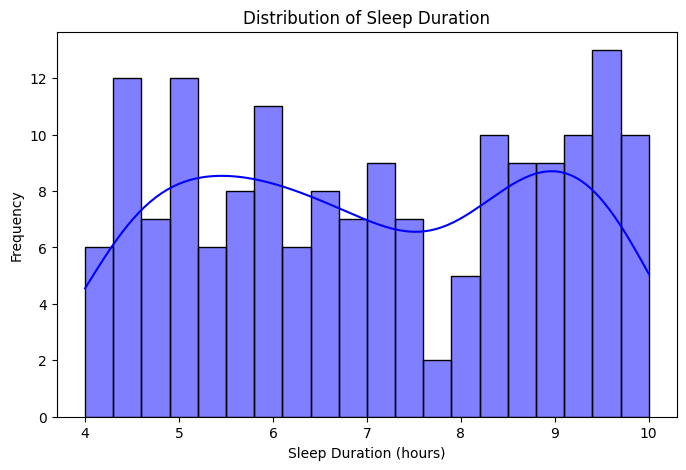

In [ ]:
# Histogram of sleep duration
plt.figure(figsize=(8, 5))
sns.histplot(df["Sleep duration"], bins=20, kde=True, color='blue')
plt.title("Distribution of Sleep Duration")
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Frequency")
plt.show()

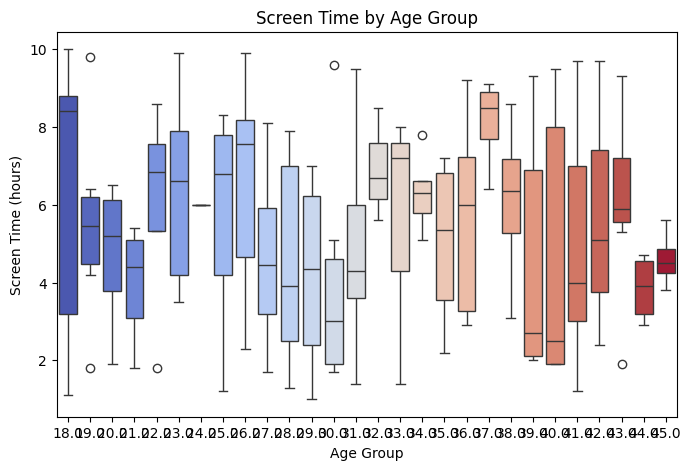

In [ ]:
# Boxplot of screen time vs. age group
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Age"], y=df["Average screen time"],hue=df["Age"] ,palette="coolwarm",legend=False)
plt.title("Screen Time by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Screen Time (hours)")
plt.show()

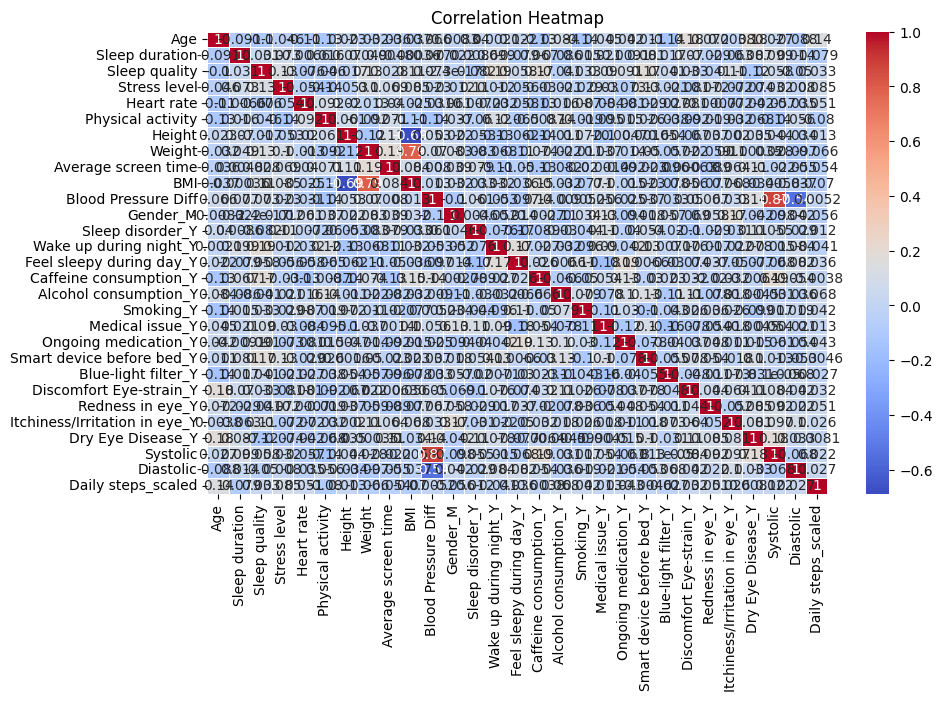

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

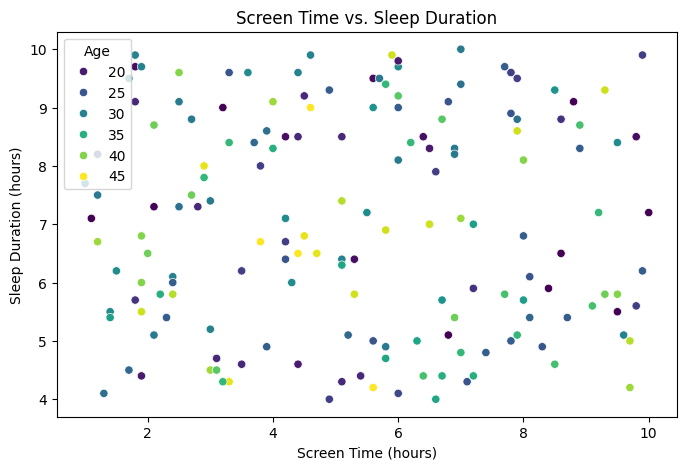

In [ ]:
# Scatter plot of screen time vs. sleep duration
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Average screen time"], y=df["Sleep duration"], hue=df["Age"], palette="viridis")
plt.title("Screen Time vs. Sleep Duration")
plt.xlabel("Screen Time (hours)")
plt.ylabel("Sleep Duration (hours)")
plt.show()

## `ML Model`

In [ ]:
df

,Age,Sleep duration,Sleep quality,Stress level,Heart rate,Physical activity,Height,Weight,Average screen time,BMI,...,Ongoing medication_Y,Smart device before bed_Y,Blue-light filter_Y,Discomfort Eye-strain_Y,Redness in eye_Y,Itchiness/Irritation in eye_Y,Dry Eye Disease_Y,Systolic,Diastolic,Daily steps_scaled
48,23.0,7.9,1.0,3.0,88.0,78.0,171.0,58.0,6.6,19.835163,...,False,False,False,True,False,False,True,102,78,0.895585
250,41.0,4.2,3.0,2.0,93.0,130.0,179.0,52.0,9.7,16.229206,...,False,False,True,True,False,True,True,116,83,1.393021
308,30.0,9.9,5.0,1.0,96.0,82.0,180.0,62.0,1.8,19.135802,...,True,True,True,True,False,False,True,129,61,0.729772
455,34.0,9.6,3.0,5.0,99.0,123.0,165.0,75.0,7.8,27.548209,...,False,True,True,False,False,True,True,134,81,-0.099289
494,26.0,6.8,3.0,1.0,72.0,148.0,180.0,87.0,8.0,26.851852,...,True,False,True,False,True,True,True,124,65,-1.259974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,21.0,8.5,3.0,4.0,95.0,151.0,152.0,68.0,5.1,29.432133,...,True,False,True,False,False,False,False,91,73,-1.425787
19344,26.0,9.7,2.0,4.0,72.0,148.0,182.0,95.0,7.7,28.680111,...,True,True,False,False,False,True,True,138,60,0.563960
19356,23.0,9.5,1.0,1.0,95.0,179.0,195.0,64.0,7.9,16.831032,...,False,False,True,False,True,False,False,107,70,-1.259974
19563,31.0,6.0,5.0,5.0,90.0,60.0,180.0,70.0,4.3,21.604938,...,False,False,True,True,True,True,False,134,66,1.227209


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, r2_score

In [ ]:
# Load dataset
df = pd.read_csv("/content/sample_data/cleaned_sleepHealth_data.csv")

In [ ]:
# Drop rows with missing values for simplicity
df_clean = df.dropna()

In [ ]:
# Encode categorical variables
label_encoders = {}
for col in df_clean.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

In [ ]:
# Features and target variables
X = df_clean.drop(columns=["Sleep quality", "Sleep duration"])


In [ ]:
# Regression Model - Predicting Sleep Quality
y_reg = df_clean["Sleep quality"]
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

In [ ]:
# Standardizing features
scaler = StandardScaler()
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

In [ ]:
# Train models
models_reg = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost Regressor": XGBRegressor(n_estimators=100, random_state=42)
}

In [ ]:
results_reg = {}
for name, model in models_reg.items():
    model.fit(X_train_reg_scaled, y_train_reg)
    y_pred = model.predict(X_test_reg_scaled)
    mae = mean_absolute_error(y_test_reg, y_pred)
    mse = mean_squared_error(y_test_reg, y_pred)
    results_reg[name] = {"MAE": mae, "MSE": mse, "r2_score":r2_score}

In [ ]:
# Classification Model - Predicting Sleep Disorder
y_clf = df_clean["Sleep duration"]
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_clf, test_size=0.2, random_state=42)

In [ ]:
# Train models
models_clf = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost Classifier": XGBClassifier(n_estimators=100, random_state=42)
}

In [ ]:
# Print results
print("Regression Model Results:")
print(results_reg)

Regression Model Results:
{'Linear Regression': {'MAE': 1.1978872048880786, 'MSE': 1.9608032955815187, 'r2_score': <function r2_score at 0x7aa2827f3e20>}, 'Random Forest Regressor': {'MAE': 1.22032437442076, 'MSE': 1.9988380908248375, 'r2_score': <function r2_score at 0x7aa2827f3e20>}, 'XGBoost Regressor': {'MAE': 1.295215747774034, 'MSE': 2.3494825009983176, 'r2_score': <function r2_score at 0x7aa2827f3e20>}}
